# Imports

In [295]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from scipy.interpolate import make_interp_spline, BSpline

# Data Loading

In [296]:
data = pd.read_csv("training_data.csv")

In [297]:
data.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [298]:
data.isna().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

In [299]:
#Drop unwanted columns
#AVERAGE_RAIN -> most part is null
#city name -> useless
#AVERAGE_PRECIPITATION -> it only has a value of 0
unwanted_columns = ["AVERAGE_RAIN", "city_name", "AVERAGE_PRECIPITATION"]
data = data.drop(unwanted_columns, axis=1)
data.head(3)

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,c�u claro
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN


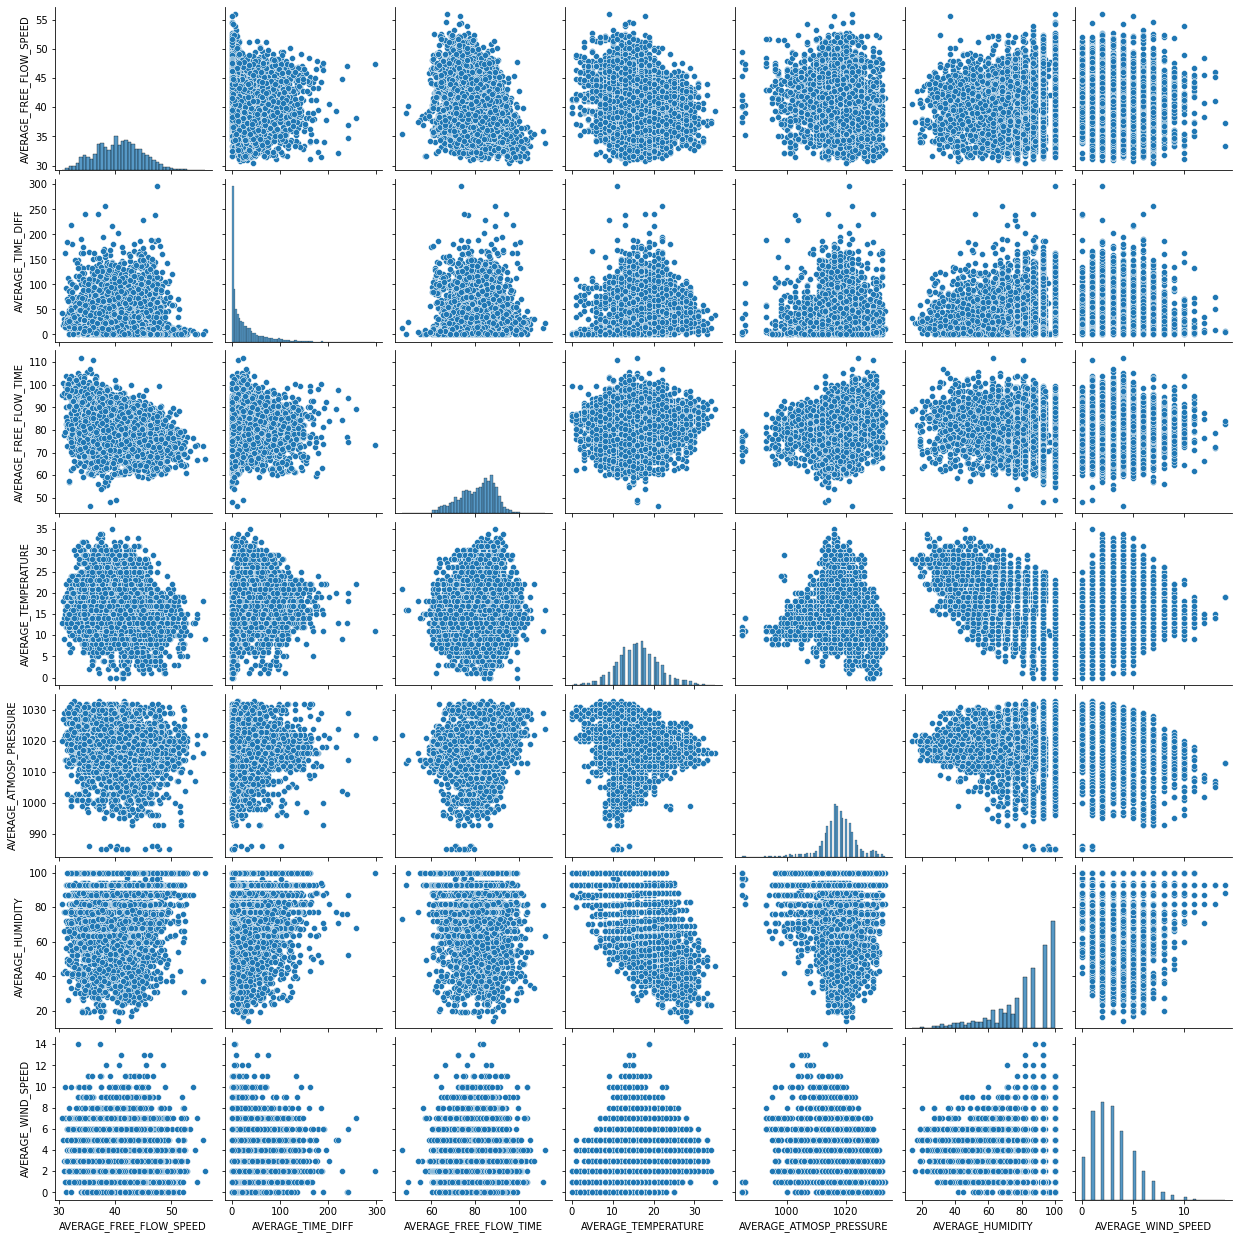

In [300]:
sns.pairplot(data)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='Count'>

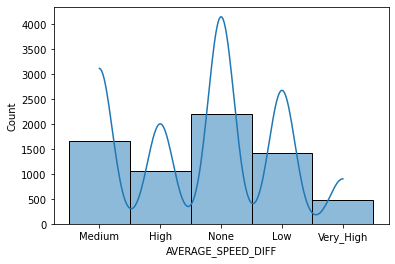

In [301]:
#Label data Distribution
sns.histplot(data['AVERAGE_SPEED_DIFF'], kde=True)

In [319]:
print(data.AVERAGE_SPEED_DIFF.unique().size)
print(data.AVERAGE_SPEED_DIFF.unique())
print(data.groupby('AVERAGE_SPEED_DIFF').count())

5
['Medium' 'High' 'None' 'Low' 'Very_High']
                    record_date  AVERAGE_FREE_FLOW_SPEED  AVERAGE_TIME_DIFF  \
AVERAGE_SPEED_DIFF                                                            
High                       1063                     1063               1063   
Low                        1419                     1419               1419   
Medium                     1651                     1651               1651   
None                       2200                     2200               2200   
Very_High                   479                      479                479   

                    AVERAGE_FREE_FLOW_TIME  LUMINOSITY  AVERAGE_TEMPERATURE  \
AVERAGE_SPEED_DIFF                                                            
High                                  1063        1063                 1063   
Low                                   1419        1419                 1419   
Medium                                1651        1651                 1651   
None  

<AxesSubplot:xlabel='record_date', ylabel='Count'>

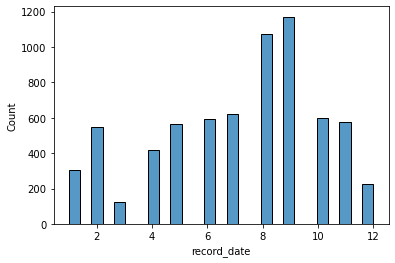

In [303]:
#Data distribution per month
distro = pd.to_datetime(data.record_date)
sns.histplot(distro.dt.month)

<AxesSubplot:xlabel='record_date', ylabel='Count'>

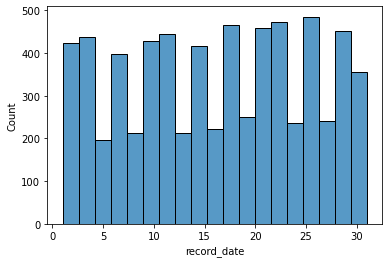

In [304]:
#Data distribution per day
distro = pd.to_datetime(data.record_date)
sns.histplot(distro.dt.day)

<AxesSubplot:xlabel='record_date', ylabel='Count'>

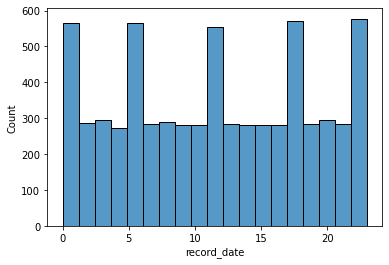

In [305]:
#Data distribution per hour
distro = pd.to_datetime(data.record_date)
sns.histplot(distro.dt.hour)

# Hourly road traffic flow
#### Low Traffic per Hour

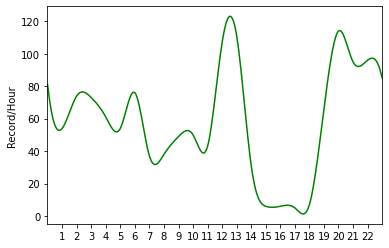

In [306]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Low']
#datan.info()
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.hour]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 23)
plt.xticks(range(1,23))
plt.plot(xnew,ynew, 'green')
plt.ylabel('Record/Hour')
plt.show()

#### Medium Traffic per Hour

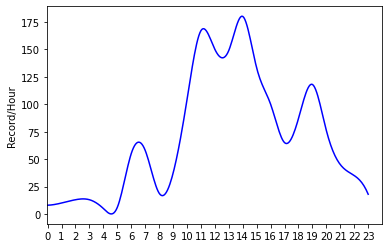

In [307]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Medium']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.hour]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 24)
plt.xticks(range(0,24))
plt.plot(xnew,ynew, 'blue')
plt.ylabel('Record/Hour')
plt.show()

#### High Traffic per Hour

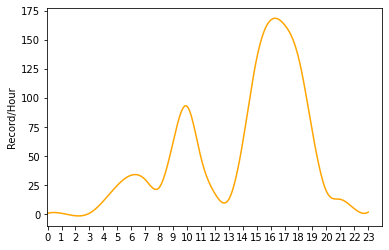

In [308]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'High']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.hour]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 24)
plt.xticks(range(0,24))
plt.plot(xnew,ynew, 'orange')
plt.ylabel('Record/Hour')
plt.show()

#### Very-High Traffic per Hour

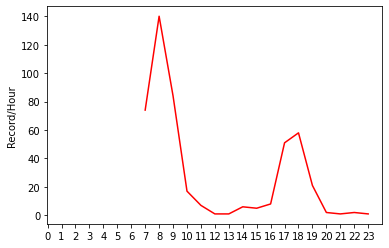

In [309]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Very_High']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.hour]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 24)
plt.xticks(range(0,24))
plt.plot(x,y, 'red')
plt.ylabel('Record/Hour')
plt.show()

#### Missing values per hour
###### A lot missing values between 0~7, 19~23

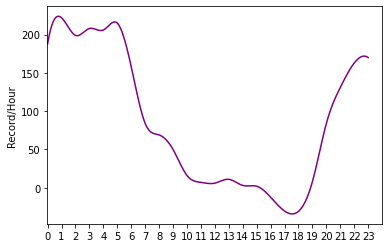

In [310]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'None']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.hour]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 24)
plt.xticks(range(0,24))
plt.plot(xnew,ynew, 'purple')
plt.ylabel('Record/Hour')
plt.show()

# Month road traffic flow
#### Low Traffic per Month

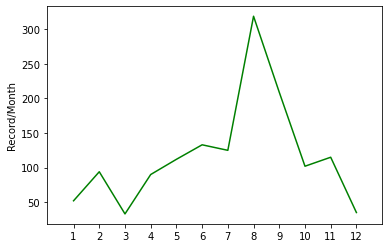

In [311]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Low']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.month]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 13)
plt.xticks(range(1,13))
plt.plot(x,y, 'green')
plt.ylabel('Record/Month')
plt.show()

#### Medium Traffic per Month

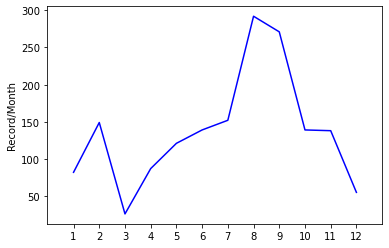

In [312]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Medium']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.month]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 13)
plt.xticks(range(1,13))
plt.plot(x,y, 'blue')
plt.ylabel('Record/Month')
plt.show()

#### High Traffic per Month

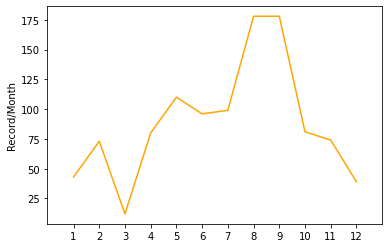

In [313]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'High']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.month]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 13)
plt.xticks(range(1,13))
plt.plot(x,y, 'orange')
plt.ylabel('Record/Month')
plt.show()

#### High Traffic per Month

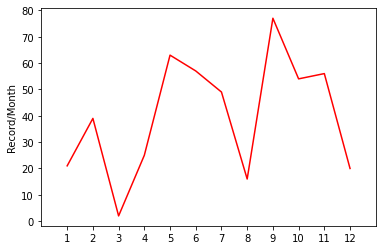

In [314]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'Very_High']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.month]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 13)
plt.xticks(range(1,13))
plt.plot(x,y, 'red')
plt.ylabel('Record/Month')
plt.show()

#### Missing Values Traffic per Month

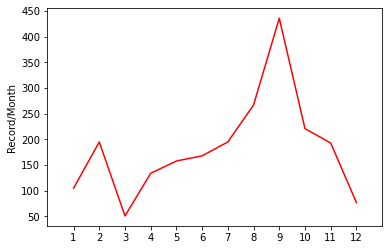

In [315]:
# Choose entries with id p01
datan = data[data['AVERAGE_SPEED_DIFF'] == 'None']
distro = pd.to_datetime(datan.record_date)
distro = datan.groupby([distro.dt.month]).count().AVERAGE_SPEED_DIFF
x = list(distro.index.values)
y = list(distro.to_numpy())
xnew = np.linspace(0,23,300)
spl = make_interp_spline(x,y)
ynew = spl(xnew)
plt.xlim(-0.02, 13)
plt.xticks(range(1,13))
plt.plot(x,y, 'red')
plt.ylabel('Record/Month')
plt.show()

In [316]:
#Sort Dataset by Date
#data_new = data.copy()
#data_new['record_date'] = pd.to_datetime(data_new.record_date)
#data_new.sort_values('record_date')

In [317]:
#Verify info by month
#distro = pd.to_datetime(data_new.record_date)
#distro = data_new.groupby([distro.dt.month]).count()
#distro

#### Correlation Matrix

<AxesSubplot:>

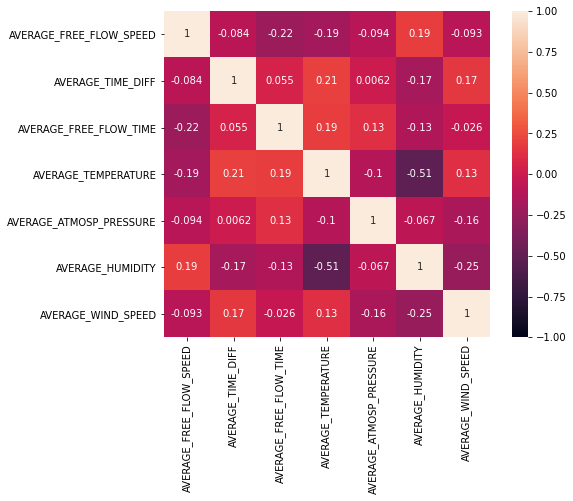

In [318]:
corr_matrix = data.corr()
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)